<a href="https://colab.research.google.com/github/yoonsungah/BigDataClass/blob/main/R4ds_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R for Data Science 실습 2 - Data wrangling and programing

## Data Wrangling (tidyr)

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Example datasets

In [2]:
table1

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [3]:
table2

country,year,type,count
<chr>,<dbl>,<chr>,<dbl>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [4]:
table3

country,year,rate
<chr>,<dbl>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


In [5]:
table4a # N. cases

country,1999,2000
<chr>,<dbl>,<dbl>
Afghanistan,745,2666
Brazil,37737,80488
China,212258,213766


In [6]:
table4b # N. population

country,1999,2000
<chr>,<dbl>,<dbl>
Afghanistan,19987071,20595360
Brazil,172006362,174504898
China,1272915272,1280428583


## pivot_longer()

데이터를 "wide" 형식에서 "long" 형식으로 변환하는 데 사용    
데이터의 구조를 변경하여 여러 열을 하나의 열로 묶어준다.

## pivot_longer(data, cols, names_to, values_to)

  data: 변환할 데이터 프레임    
  cols: long형식으로 변환할 열을 선택    
  names_to: 새로 생성될 열의 이름 (원래 열 이름이 데이터로 들어가 저장)    
  values_to: 값이 저장될 새 열의 이름 (원래 열에 속한 데이터가 새로운 열로 저장)

  바로 밑의 코드가 예시이다.

One variable might be spread across multiple columns

Apply pivot_longer() to table4a

In [8]:
table4a


# wide -> long form 으로 변경
# 1999, 2000 이 원래 열이름이었는데 year이라는 새로운 열에 데이터로 들어가고
# 1999, 2000 의 데이터 값은 cases라는 새로운 열에 저장됨
table4a %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")


country,1999,2000
<chr>,<dbl>,<dbl>
Afghanistan,745,2666
Brazil,37737,80488
China,212258,213766


country,year,cases
<chr>,<chr>,<dbl>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


apply it to table4b

In [10]:
table4b

# 1999, 2000 열이 year에 속하는 데이터가 되고
# 인구수가 새롭게 열로 추가되면서 1999, 2000에 있던 데이터가 저장됨
table4b %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")


country,1999,2000
<chr>,<dbl>,<dbl>
Afghanistan,19987071,20595360
Brazil,172006362,174504898
China,1272915272,1280428583


country,year,population
<chr>,<chr>,<dbl>
Afghanistan,1999,19987071
Afghanistan,2000,20595360
Brazil,1999,172006362
Brazil,2000,174504898
China,1999,1272915272
China,2000,1280428583


Join two tables

In [11]:
# left_join : 왼쪽 테이블에 있는 year, cases면 population이 저장됨
tidy4a <- table4a %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")
tidy4b <- table4b %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")
left_join(tidy4a, tidy4b)


Joining with `by = join_by(country, year)`


country,year,cases,population
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [15]:
# right_join : 오른쪽 테이블에 있는 year, cases면 cases가 저장됨

tidy4a <- table4a %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")
tidy4b <- table4b %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")
right_join(tidy4a, tidy4b)

Joining with `by = join_by(country, year)`


country,year,cases,population
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## Pivot_wider()

데이터를 "long" 형식에서 "wide" 형식으로 변환하는 데 사용    
데이터의 구조를 변경하여 여러 열을 단일 열로 결합하여 데이터의 구조를 변경

## pivot_wider(data, cols, names_from, values_from, values_fill)

data: 변환할 원본 데이터 프레임입니다.    
names_from: 새로운 열 이름을 생성할 열을 지정합니다. 이 열의 고유한 값들이 새로운 열의 이름이 됩니다.    
values_from: 새로 생성된 열에 들어갈 값을 지정하는 열입니다. 이 열의 값들이 새로운 열의 셀에 채워집니다.    
values_fill: 새로운 열에서 결측값을 채울 값을 지정합니다. 기본값은 NA입니다.

One observation might be scattered across multiple rows

In [ ]:
table2

country,year,type,count
<chr>,<int>,<chr>,<int>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [ ]:
table2 %>% pivot_wider(names_from = type, values_from = count)

country,year,cases,population
<chr>,<int>,<int>,<int>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


2.3.3 Exercises
1. pivot_longer()와 pivot_wider()가 완벽하게 대칭적이지 않은 이유?
```
stocks <- tibble(
  year   = c(2015, 2015, 2016, 2016),
  half  = c(   1,    2,     1,    2),
  return = c(1.88, 0.59, 0.92, 0.17)
)
stocks %>%
  pivot_wider(names_from = year, values_from = return) %>%
  pivot_longer(`2015`:`2016`, names_to = "year", values_to = "return")
```
(Hint: look at the variable types and think about column names.)  
`pivot_longer()` has a `names_ptypes` argument, e.g.  `names_ptypes = list(year = double())`. What does it do?

2. 이 코드는 왜 옳지 않은가요? ==> 열이름은 따옴표로 감싸주자
```
table4a %>%
  pivot_longer(c(1999, 2000), names_to = "year", values_to = "cases")
#> Error in `pivot_longer()`:
#> ! Can't subset columns past the end.
#> ℹ Locations 1999 and 2000 don't exist.
#> ℹ There are only 3 columns.
```

3. What would happen if you widen this table? Why? How could you add a new column to uniquely identify each value?    
==> 표를 넓힐 경우, 동일한 식별자에 여러 행이 해당되는 경우에는 모호성이나 오류가 발생할 수 있습니다. pivot_wider()는 각 열에 대해 고유한 식별자 조합이 필요하다.
```
people <- tribble(
  ~name,             ~names,  ~values,
  #-----------------|--------|------
  "Phillip Woods",   "age",       45,
  "Phillip Woods",   "height",   186,
  "Phillip Woods",   "age",       50,
  "Jessica Cordero", "age",       37,
  "Jessica Cordero", "height",   156
)
```
4. 아래의 간단한 tibble을 정리하세요. 넓게 만들거나 길게 만들어야 하나요? 변수는 무엇인가요?
```
preg <- tribble(
  ~pregnant, ~male, ~female,
  "yes",     NA,    10,
  "no",      20,    12
)
```

In [45]:
#3. 유일한 식별자 추가해봄

people <- tribble(
  ~name,             ~names,  ~values,
  #-----------------|--------|------
  "Phillip Woods",   "age",       45,
  "Phillip Woods",   "height",   186,
  "Phillip Woods",   "age",       50,
  "Jessica Cordero", "age",       37,
  "Jessica Cordero", "height",   156
)
people

people %>% mutate(unique_id = seq(from = 1, to = length(name), by = 1)) %>%
  pivot_wider(names_from = names, values_from = values)

name,names,values
<chr>,<chr>,<dbl>
Phillip Woods,age,45
Phillip Woods,height,186
Phillip Woods,age,50
Jessica Cordero,age,37
Jessica Cordero,height,156


name,unique_id,age,height
<chr>,<dbl>,<dbl>,<dbl>
Phillip Woods,1,45,NA
Phillip Woods,2,NA,186
Phillip Woods,3,50,NA
Jessica Cordero,4,37,NA
Jessica Cordero,5,NA,156


In [53]:
#3. 바로 위 코드에서 NA값 없애려고해봄

people <- people %>%
  group_by(name, names) %>% # name이랑 names가 같지 않으면 다른 데이터로 인식하게 함
  mutate(id = row_number()) %>%
  ungroup()

# pivot_wider() 사용
wider_people <- people %>%
  pivot_wider(names_from = names, values_from = values)

wider_people

name,id,age,height
<chr>,<int>,<dbl>,<dbl>
Phillip Woods,1,45,186
Phillip Woods,2,50,NA
Jessica Cordero,1,37,156


In [58]:
# 4. preg 테이블 정리해보기

preg <- tribble(
  ~pregnant, ~male, ~female,
  "yes",     NA,    10,
  "no",      20,    12
)

preg %>%
  pivot_wider(names_from = pregnant, values_from = c(male, female))

male_yes,male_no,female_yes,female_no
<dbl>,<dbl>,<dbl>,<dbl>
NA,20,10,12


## Separating and Uniting

## separate()

One column contains two variables

In [ ]:
table3

,country,year,rate
,<chr>,<int>,<chr>
1,Afghanistan,1999,745/19987071
2,Afghanistan,2000,2666/20595360
3,Brazil,1999,37737/172006362
4,Brazil,2000,80488/174504898
5,China,1999,212258/1272915272
6,China,2000,213766/1280428583


In [ ]:
table3 %>% separate(rate, into = c("cases", "population"))

country,year,cases,population
<chr>,<int>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [ ]:
table3 %>% separate(rate, into = c("cases", "population")) %>% mutate(cases = as.numeric(cases), population = as.numeric(population))

country,year,cases,population
<chr>,<int>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [ ]:
table3 %>% extract(rate, c("cases", "population"), regex = "([0-9]+)/([0-9]+)")

country,year,cases,population
<chr>,<dbl>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## unite() : 합치기 예) 19+99 = 1999

Single variable is spread across multiple columns

In [ ]:
table5

,country,century,year,rate
,<chr>,<chr>,<chr>,<chr>
1,Afghanistan,19,99,745/19987071
2,Afghanistan,20,00,2666/20595360
3,Brazil,19,99,37737/172006362
4,Brazil,20,00,80488/174504898
5,China,19,99,212258/1272915272
6,China,20,00,213766/1280428583


In [ ]:
table5 %>%
  unite(new, century, year, sep = "")


country,new,rate
<chr>,<chr>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


12.4.3 Exercises
1. separate()에서 extra와 fill 인수가 무엇을 하나요? 다음 두 개의 장난감 데이터셋에 대해 다양한 옵션을 실험해 보세요.
```
extra: 이 인수는 분리할 때, 남은 데이터를 어떻게 처리할지를 결정합니다. 예를 들어, 'drop'으로 설정하면 남는 열이 제거되고, 'merge'로 설정하면 남는 열이 마지막 열과 병합됩니다.
fill: 이 인수는 분리 후 생성되는 열에 결측값이 있을 때, 결측값을 어떻게 처리할지를 결정합니다. 'right'로 설정하면 오른쪽 열을 기준으로 결측값을 채웁니다.
```
```
tibble(x = c("a,b,c", "d,e,f,g", "h,i,j")) %>%
  separate(x, c("one", "two", "three"))
```
```
tibble(x = c("a,b,c", "d,e", "f,g,i")) %>%
  separate(x, c("one", "two", "three"))
```
2. unite()와 separate() 모두 remove 인수가 있습니다. 이 인수는 무엇을 하나요? 왜 FALSE로 설정하나요?

3. separate()와 extract()를 비교하고 대조해 보세요. 위치별, 구분자별, 그룹별로 나누는 세 가지 변형이 있지만, unite는 하나만 있는 이유는 무엇인가요?

# Functional Programming

In [ ]:
df <- tibble(
  a = rnorm(10),
  b = rnorm(10),
  c = rnorm(10),
  d = rnorm(10)
)

In [ ]:
df

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
0.2897577,0.16664158,0.6872394,0.55466489
1.7851222,2.04789511,1.3014184,-0.53053395
0.2597240,-0.02244299,-1.4245135,0.04614628
0.6695012,0.64411280,1.5387469,-1.95648015
1.5917231,-0.71861807,-0.1148884,-0.95466182
-0.1754023,0.84335090,1.4792312,-2.02047210
1.3738296,-0.74584389,0.4393677,1.69871484
1.0207140,1.64790838,-0.1880078,0.26984891
0.9573955,0.66484396,0.6015591,0.82904747


In [ ]:
median(df$a)
#> [1] -0.2457625
median(df$b)
#> [1] -0.2873072
median(df$c)
#> [1] -0.05669771
median(df$d)
#> [1] 0.1442633

[1] 0.8134484

[1] 0.4053772

[1] 0.5204634

[1] -0.2421938

Don't copy and paste multiple times  
You can iterate using for loops


In [ ]:
output <- vector("double", ncol(df))  # 1. output
for (i in seq_along(df)) {            # 2. sequence
  output[[i]] <- median(df[[i]])      # 3. body
}
output


[1]  0.8134484  0.4053772  0.5204634 -0.2421938

In [ ]:
output <- c()
output


NULL

In [ ]:
output <- c()
for (i in seq_along(df)) {            # 2. sequence
  output <- c( output, median(df[[i]]) )      # 3. body
}
output


[1]  0.8134484  0.4053772  0.5204634 -0.2421938

In [ ]:
install.packages("rbenchmark")
library(rbenchmark)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

simple1 <- function(n) {
  output <- vector("double", n)
  for(i in 1:n)
    output[i] = i
  return(output)
}

simple2 <- function(n) {
  output <- c()
  for(i in 1:n)
    output = c(output, i)
  return(output)
}


In [ ]:
simple1(10)

[1]  1  2  3  4  5  6  7  8  9 10

In [ ]:
simple2(10)

[1]  1  2  3  4  5  6  7  8  9 10

In [ ]:
benchmark("fc1"=simple1(1000),
          "fc2"=simple2(1000),
          replications=100,
          columns=c('test', 'elapsed', 'replications'))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.006,100
2,fc2,0.226,100


In [ ]:
226/6


[1] 37.66667

## for_loops vs functional

Possible to wrap up for loops in a function


In [ ]:
col_mean <- function(df) {
  output <- vector("double", ncol(df))
  for (i in seq_along(df)) {
    output[[i]] <- mean(df[[i]])
  }
  output
}

col_median <- function(df) {
  output <- vector("double", ncol(df))
  for (i in seq_along(df)) {
    output[[i]] <- median(df[[i]])
  }
  output
}

col_sd <- function(df) {
  output <- vector("double", ncol(df))
  for (i in seq_along(df)) {
    output[[i]] <- sd(df[[i]])
  }
  output
}

col_mean(df)

[1]  0.6723523  0.3396382  0.3697444 -0.2943995

You can make function as a variable

In [ ]:
col_summary <- function(df, fun) {
  out <- vector("double", length(df))
  for (i in seq_along(df)) {
    out[i] <- fun(df[[i]])
  }
  out
}
col_summary(df, median)


[1]  0.8134484  0.4053772  0.5204634 -0.2421938

## The map function (purrr)

the purrr package provides a family of functions for looping patterns over a vector

remind apply()

In [ ]:
str(df)

tibble [10 × 4] (S3: tbl_df/tbl/data.frame)
 $ a: num [1:10] 0.29 1.79 0.26 0.67 1.59 ...
 $ b: num [1:10] 0.1666 2.0479 -0.0224 0.6441 -0.7186 ...
 $ c: num [1:10] 0.687 1.301 -1.425 1.539 -0.115 ...
 $ d: num [1:10] 0.5547 -0.5305 0.0461 -1.9565 -0.9547 ...


In [ ]:
df

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
0.2897577,0.16664158,0.6872394,0.55466489
1.7851222,2.04789511,1.3014184,-0.53053395
0.2597240,-0.02244299,-1.4245135,0.04614628
0.6695012,0.64411280,1.5387469,-1.95648015
1.5917231,-0.71861807,-0.1148884,-0.95466182
-0.1754023,0.84335090,1.4792312,-2.02047210
1.3738296,-0.74584389,0.4393677,1.69871484
1.0207140,1.64790838,-0.1880078,0.26984891
0.9573955,0.66484396,0.6015591,0.82904747


In [ ]:
df %>% map_dbl(mean)

a          b          c          d 
 0.6723523  0.3396382  0.3697444 -0.2943995

In [ ]:
df %>% map(mean)

$a
[1] 0.6723523

$b
[1] 0.3396382

$c
[1] 0.3697444

$d
[1] -0.2943995

In [ ]:
df %>% map_dbl(median)

a          b          c          d 
 0.8134484  0.4053772  0.5204634 -0.2421938

In [ ]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [ ]:
mtcars %>%
  split(.$cyl)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2


You can define a function in map

In [ ]:
f1 <- function(df) {
  lm(mpg ~ wt, data = df)
}

mtcars %>%
  split(.$cyl) %>%
  map(f1)

$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [ ]:
mtcars %>%
  split(.$cyl) %>%
  map(function(df) lm(mpg ~ wt, data = df))


$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [ ]:
f1 <- function(df) {
  lm(mpg ~ wt, data = df)
}
mtcars %>%
  split(.$cyl) %>%
  map(f1)

$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [ ]:
mtcars %>%
  split(.$cyl) %>%
  map(~lm(mpg ~ wt, data = .))


$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [ ]:
df %>% map_dbl(mean)

a          b          c          d 
 0.6723523  0.3396382  0.3697444 -0.2943995

In [ ]:
df %>% map_dbl(~mean(.))

a          b          c          d 
 0.6723523  0.3396382  0.3697444 -0.2943995

## Extract Component

In [ ]:
mtcars %>%
  split(.$cyl) %>%
  map(~lm(mpg ~ wt, data = .)) %>%
  map(summary)

$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1513 -1.9795 -0.6272  1.9299  5.2523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   39.571      4.347   9.104 7.77e-06 ***
wt            -5.647      1.850  -3.052   0.0137 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.332 on 9 degrees of freedom
Multiple R-squared:  0.5086,	Adjusted R-squared:  0.454 
F-statistic: 9.316 on 1 and 9 DF,  p-value: 0.01374


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Residuals:
     Mazda RX4  Mazda RX4 Wag Hornet 4 Drive        Valiant       Merc 280 
       -0.1250         0.5840         1.9292        -0.6897         0.3547 
     Merc 280C   Ferrari Dino 
       -1.0453        -1.0080 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   28.409      4.184   6.789  0.00105 **
wt            -2.780      1.335  -2.083  0.09176 . 
---
Signif.

In [ ]:
mtcars %>%
  split(.$cyl) %>%
  map(~lm(mpg ~ wt, data = .)) %>%
  map(summary) %>%
  map_dbl(~.$r.squared)


4         6         8 
0.5086326 0.4645102 0.4229655

In [ ]:
mtcars %>%
  split(.$cyl) %>%
  map(~lm(mpg ~ wt, data = .)) %>%
  map(summary) %>%
  map_dbl('r.squared')


4         6         8 
0.5086326 0.4645102 0.4229655

You can also use an integer to select elements by position

In [ ]:
x <- list(list(1, 2, 3), list(4, 5, 6), list(7, 8, 9))
x %>% map_dbl(2)
#> [1] 2 5 8


[1] 2 5 8

In [ ]:
x

[[1]]
[[1]][[1]]
[1] 1

[[1]][[2]]
[1] 2

[[1]][[3]]
[1] 3


[[2]]
[[2]][[1]]
[1] 4

[[2]][[2]]
[1] 5

[[2]][[3]]
[1] 6


[[3]]
[[3]][[1]]
[1] 7

[[3]][[2]]
[1] 8

[[3]][[3]]
[1] 9

Functional Programming is memory efficient by not saving internal calculations. Easier to understand if you get used to it.

Is it fater as well?

In [ ]:
n_len = 10

In [ ]:
rep(10,n_len)

[1] 10 10 10 10 10 10 10 10 10 10

In [ ]:
rep(10,n_len) %>% map(rnorm)

[[1]]
 [1]  0.7429728 -0.3297904  0.0510513 -0.6201134 -0.1898323  0.3998129
 [7]  1.0095317  1.6244545  0.6830163  0.5726511

[[2]]
 [1] -1.4018398  0.8672232  1.5681101  0.1199568  1.5116688  1.4784141
 [7] -1.5389568  0.3501428 -0.1269016  0.7069362

[[3]]
 [1] -0.0731256 -0.3252491 -0.7805141  0.4397444  0.3761291  0.8017001
 [7] -0.1445211 -0.3635880  1.9726093 -0.9074145

[[4]]
 [1]  0.1471247  0.8758844 -0.4896714 -0.1364627  0.8855002 -0.5718024
 [7]  0.9476499  0.8413031 -1.1919564  0.7954304

[[5]]
 [1]  0.48806875  0.46998239  2.39772716  0.60126435  0.08922561 -0.53941778
 [7]  0.30222769 -0.77268917  0.74093541 -1.01444038

[[6]]
 [1]  0.4660953  0.9109272  1.6439227 -0.1012764 -2.0096921 -1.1010533
 [7]  0.9355712 -1.0505492 -0.2579142 -0.2147175

[[7]]
 [1] -1.30507988  0.60747205  0.05691560 -0.03428378 -0.49156656  0.02613707
 [7]  1.82888191  0.67736028 -0.01948040 -0.32417471

[[8]]
 [1]  0.31524628 -0.95792176  0.97383618 -0.36627622  0.29666500  0.02291863
 [7]  1.42718630 -1.07998655 -0.12407800  0.13254866

[[9]]
 [1]  0.0461385439 -1.1223199452 -1.4203357231 -0.6368241164 -0.0111277351
 [6]  0.0001989229 -0.9456664458  0.0318596064 -1.0321900445  1.2189532480

[[10]]
 [1]  0.58690536  0.04596183  0.54087671  0.26223488  0.18741668  0.96460219
 [7] -0.30860257  0.29619431  0.60734699  0.62578501

In [ ]:
df2 <- vector(mode = "list", length = n_len)
for (i in 1:n_len)
  df2[[i]] <- rnorm(10)
df2

[[1]]
 [1] -0.1024487  0.3797305  0.4420737 -0.3125294  0.6575282  1.1874648
 [7] -0.6633741  1.1675507 -0.6532159  0.5320027

[[2]]
 [1] -0.01665178 -0.32302024 -1.00938712  0.42702051 -0.41265338 -1.49066076
 [7]  0.24729760  0.76890927 -0.26024908  0.37143799

[[3]]
 [1] -0.47771886 -1.46336950  0.74446659  0.56756839  0.20544324  0.24956849
 [7] -0.13132824  0.39518773  0.08494923  0.27210259

[[4]]
 [1]  0.9097382 -0.5580852  2.4812245 -0.2497129 -1.3524861 -1.7071781
 [7]  1.0224375 -2.3537141 -0.7436577  1.5443334

[[5]]
 [1] -0.88495074 -0.70391972  0.17072744  0.42488013 -1.03947675 -1.20029435
 [7] -0.03527654 -0.02751302  0.33438448  0.40543960

[[6]]
 [1]  0.7667980  0.6366442 -1.0822321 -1.3523314 -0.3956084  1.4583305
 [7] -2.5430355  0.8398272 -1.3551542  0.6210143

[[7]]
 [1] -0.01532549  1.04266202  1.23616636 -1.12641818  0.18026970 -1.21042560
 [7] -0.73503933  0.14462271 -0.91333535 -0.29284459

[[8]]
 [1]  0.72959428 -1.15863593  0.85462203 -0.06783435  0.05326202 -0.65951642
 [7] -0.56270104 -0.23223669  0.91506853 -0.86148312

[[9]]
 [1] -0.41089197  0.09661153 -1.55193970  0.17905954  0.22079470  0.04292780
 [7]  0.57096404  0.21560602 -2.92811960  0.20712843

[[10]]
 [1] -0.239621401  0.089571250 -0.702042110 -0.823787499 -1.992348426
 [6] -0.216953817  0.006058694 -0.260885764  1.796458994 -1.478069234

In [ ]:
lapply(rep(10,n_len), rnorm )

[[1]]
 [1] -1.0349300  1.0484451 -0.5163824  0.3913612 -0.4700265 -0.2872011
 [7] -1.7314988  0.3153181 -1.2419798 -1.5638758

[[2]]
 [1] -0.2674436 -0.2611410  0.4206925  1.0950122  0.2283938 -0.7732902
 [7] -0.9602406  1.1313309 -1.5378661 -1.7495781

[[3]]
 [1] -0.9224670  0.4794961  1.2828899 -1.2552933 -0.1755910  0.8614980
 [7] -0.1119487 -0.7350812 -0.2516985  0.4419869

[[4]]
 [1]  1.07366370  0.19135782 -1.21997611  2.63405174  0.30263822  0.04919794
 [7] -0.49318510  1.04372040 -1.88269367  1.02491887

[[5]]
 [1]  1.0425299  1.2149158  0.7841957  0.1245245  0.1544754 -0.4258641
 [7]  0.1395425 -1.2133111 -0.3640544  2.9606341

[[6]]
 [1]  3.1866178 -1.8737422 -0.1636236  0.8533894  1.2392070 -2.9225452
 [7] -0.6579105 -1.2717543  0.2015858  1.1005620

[[7]]
 [1] -0.29241637 -0.09396636  0.30790294  0.83306291 -0.84582734 -0.29991846
 [7] -0.53770063 -1.06640699 -0.99384144 -1.97095948

[[8]]
 [1] -0.24981334 -1.86578277 -0.31413674 -1.95920834  0.09508427 -0.38669752
 [7] -1.08650756  0.35343305  0.08278537 -0.47987882

[[9]]
 [1] -0.36761014  0.59356573 -0.81210041 -0.73573527  0.62243593 -0.91882218
 [7] -0.15835096 -0.04803343  0.13038094 -0.43990891

[[10]]
 [1]  0.4502152  0.7223453  1.8513461  1.5333613 -1.0521630  0.1405313
 [7] -2.2012907  0.9774962  0.6239100 -0.7778840

In [ ]:
gen1 <- function(n_len) {
  rep(10,n_len) %>% map(rnorm)
}

In [ ]:
gen2 <- function(n_len) {
  df2 <- vector(mode = "list", length = n_len)
  for (i in 1:n_len)
    df2[[i]] <- rnorm(10)
  df2
}

In [ ]:
gen3 <- function(n_len) {
  lapply(rep(10,n_len), rnorm )
}

In [ ]:
gen2(10)

[[1]]
 [1] -0.6933902 -1.4748128  0.3576128 -1.6721449 -0.8949694 -0.3363422
 [7] -2.3187918 -0.2723356 -1.1357661 -0.6720771

[[2]]
 [1]  1.67525049 -0.12617850  1.29989670  2.35537439 -1.75151507 -0.50582184
 [7]  0.28954995 -1.01519621  0.30189475 -0.08594665

[[3]]
 [1] -0.8721940 -0.5867830  1.5014965 -0.3165459 -1.6384562 -0.2694609
 [7] -0.7545588  0.1676650  1.2883020 -1.2581720

[[4]]
 [1] -1.1936634  0.4804374  0.4692502  1.2801237 -0.7459213 -0.6115064
 [7] -0.4087165 -1.9844106  1.7506640 -0.4230546

[[5]]
 [1]  0.15550003 -0.29739432 -0.64691200 -0.27818150  0.06217115  0.50288011
 [7] -1.82188264  0.83292258 -0.54498097  0.67951961

[[6]]
 [1]  2.2269318  0.7706902 -0.7847623  1.1747990  0.1409468 -0.9872823
 [7] -0.5168302  0.1434519  1.4468596  0.7942783

[[7]]
 [1] -0.82591779 -1.71039461  0.24201006 -0.03028460 -0.07177468 -0.89991837
 [7]  0.04907681 -2.30572115 -1.18539896 -0.33419094

[[8]]
 [1]  0.04262446  0.13390298  1.01451147 -1.69747519 -1.05266449  0.84029239
 [7]  0.31388838 -0.49872123  0.43923044 -0.31786456

[[9]]
 [1]  0.006963931  0.585551418  0.569972067 -2.732538265  1.153390505
 [6]  0.056619595  0.498856180 -0.563539030  1.052220245  0.925427011

[[10]]
 [1]  0.513569056 -0.687143740  0.418083699  0.352997082  2.164430085
 [6]  0.088077889  0.005535154  0.901600538 -0.055769030 -0.466702984

In [ ]:
benchmark("fc1"=gen1(1000),
          "fc2"=gen2(1000),
          "fc3"=gen3(1000),
          replications=100,
          columns=c('test', 'elapsed', 'replications'))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.442,100
2,fc2,0.384,100
3,fc3,0.411,100


# Something useful

In [ ]:
diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


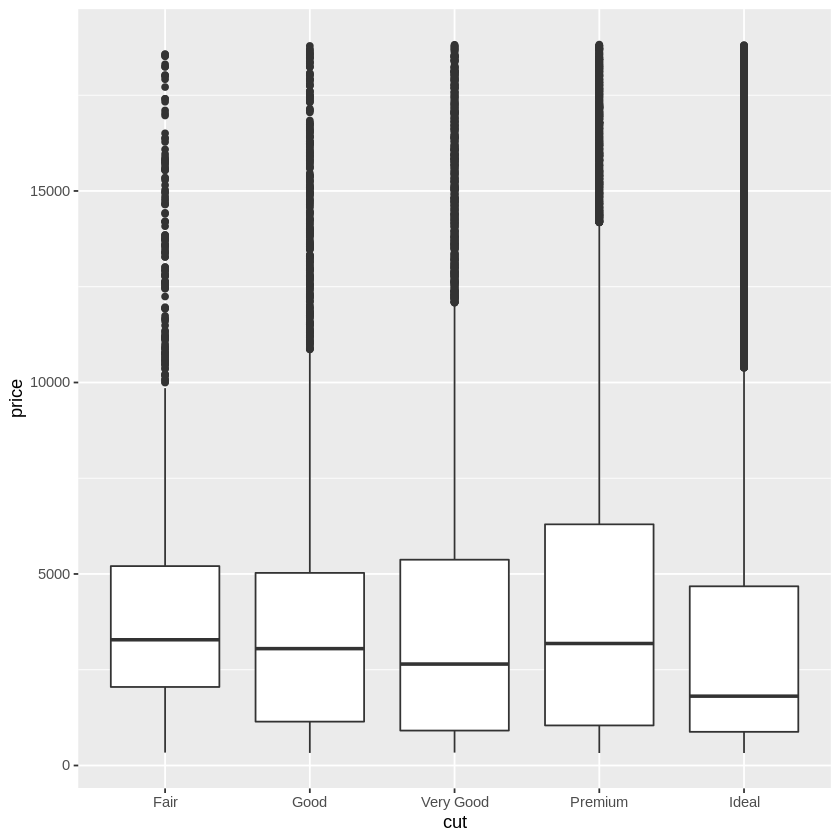

In [ ]:
diamonds %>% ggplot(aes(cut, price)) + geom_boxplot()

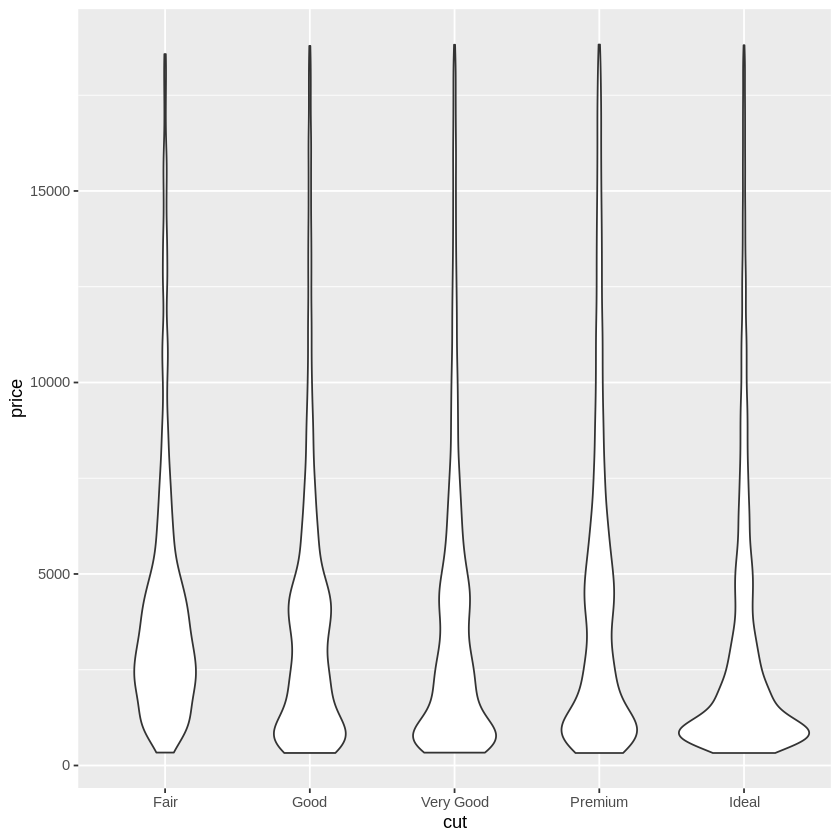

In [ ]:
diamonds %>% ggplot(aes(cut, price)) + geom_violin()

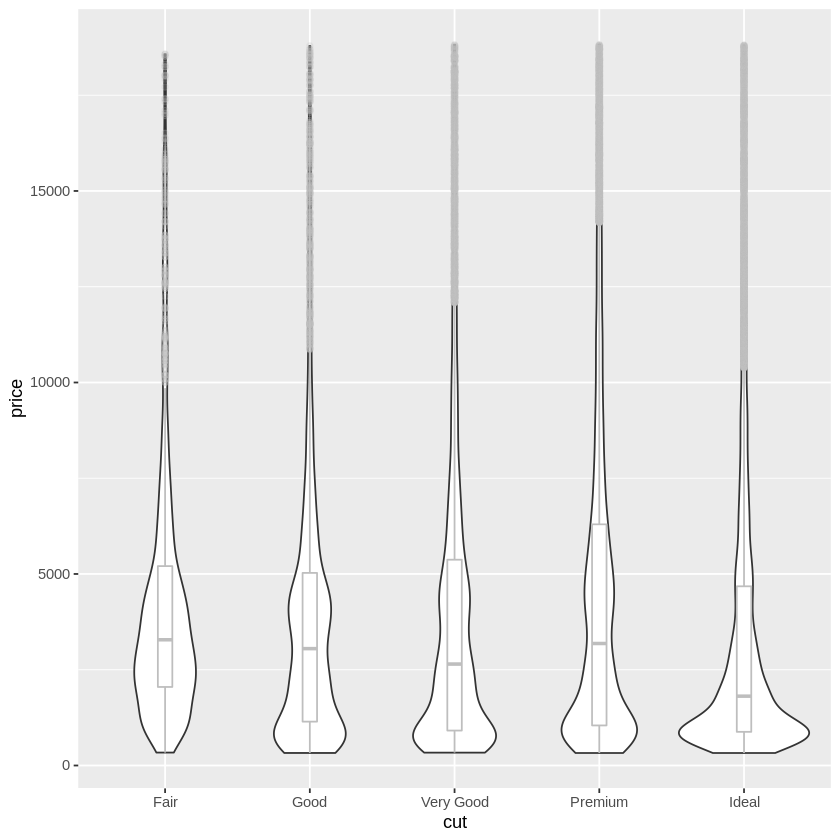

In [ ]:
diamonds %>% ggplot(aes(cut, price)) + geom_violin() + geom_boxplot(width=0.1, color="grey", alpha=0.2)